# Supervised Machine Learning (Regression)

## The List of Content
    1. Importing Libraries & Data
    2. Data Cleaning
    3. Data Prep for Regression Analysis
    4. Regression Analysis
    5. Discussion

## 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\praha\OneDrive\Documents\Python\04-2023 World University Rankings\02. Data'

In [4]:
# import data
df = pd.read_pickle(os.path.join(path, 'Prepared Data', 'world_university_rankings_cleaned_wrangled.pkl'))

In [5]:
df.head()

,world_rank,institution,country,national_rank,education_quality_rank,alumni_employment_rank,Faculty_quality_rank,publications_rank,influence_rank,citations,broad_impact_rank,patents_rank,score,year,the_best_world_rank
0,1,Harvard University,USA,1,7,9,1,1,1,1,496,5,100.00,2012,1
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496,1,91.67,2012,1
2,3,Stanford University,USA,3,17,11,5,4,2,2,496,15,89.50,2012,1
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496,50,86.17,2012,3
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496,18,85.21,2012,1


In [8]:
df.describe()

,world_rank,national_rank,education_quality_rank,alumni_employment_rank,Faculty_quality_rank,publications_rank,influence_rank,citations,broad_impact_rank,patents_rank,score,year,the_best_world_rank
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.635909,433.346364,47.798395,2014.318182,81.224545
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,273.561106,273.996525,7.760806,0.762130,143.657327
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000,1.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,273.000000,170.750000,44.460000,2014.000000,1.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000,35.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000,68.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000,962.000000


## 2. Data Cleaning

The Data frame has been cleaned

## 3. Data Prep for Regression Analysis 

### Hypothesis: 
#### Higher-ranked universities tend to have a higher rank of alumni employment than lower-ranked universities.

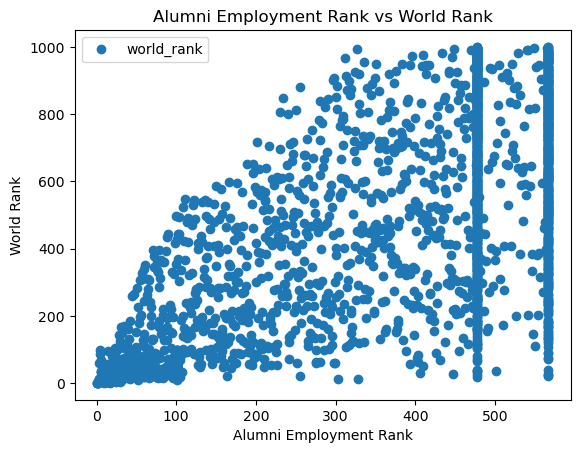

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'alumni_employment_rank', y='world_rank',style='o') 
plt.title('Alumni Employment Rank vs World Rank')  
plt.xlabel('Alumni Employment Rank')  
plt.ylabel('World Rank')  
plt.show()

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['alumni_employment_rank'].values.reshape(-1,1)
y = df['world_rank'].values.reshape(-1,1)

In [11]:
X

array([[  9],
       [ 17],
       [ 11],
       ...,
       [549],
       [567],
       [567]], dtype=int64)

In [12]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [13]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

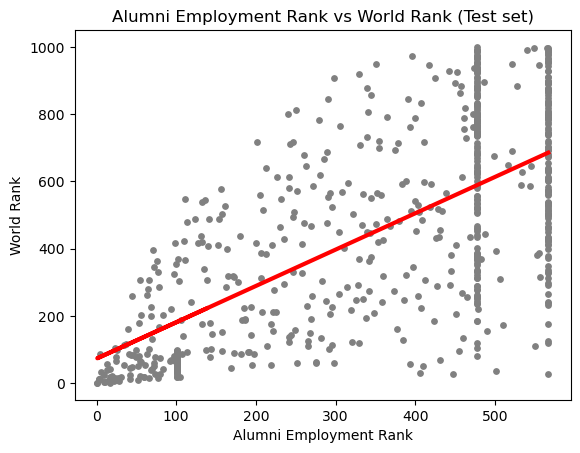

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Alumni Employment Rank vs World Rank (Test set)')
plot_test.xlabel('Alumni Employment Rank')
plot_test.ylabel('World Rank')
plot_test.show()

#### Based on the scatterplot, it is evident that there exists a direct correlation between the independent variable and the dependent variable. In the case of the hypothesis, "Higher-ranked universities tend to have a higher rank of alumni employment than lower-ranked universities."

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.0800366]]
Mean squared error:  49226.655340322366
R2 score:  0.46703930595672927


In [20]:
y_predicted

array([[685.61553989],
       [158.55767713],
       [279.52177678],
       [ 99.15566391],
       [508.48953683],
       [182.31848242],
       [589.49228214],
       [146.67727448],
       [425.32671832],
       [589.49228214],
       [150.9974209 ],
       [685.61553989],
       [381.04521756],
       [443.68734059],
       [589.49228214],
       [144.51720128],
       [685.61553989],
       [589.49228214],
       [685.61553989],
       [589.49228214],
       [354.04430246],
       [536.57048854],
       [589.49228214],
       [685.61553989],
       [685.61553989],
       [685.61553989],
       [589.49228214],
       [401.56591303],
       [589.49228214],
       [391.8455836 ],
       [589.49228214],
       [182.31848242],
       [182.31848242],
       [358.36444887],
       [685.61553989],
       [685.61553989],
       [589.49228214],
       [589.49228214],
       [229.84009299],
       [155.31756732],
       [182.31848242],
       [414.52635228],
       [589.49228214],
       [309

In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,121,685.615540
1,168,158.557677
2,92,279.521777
3,65,99.155664
4,529,508.489537
5,71,182.318482
6,366,589.492282
7,200,146.677274
8,247,425.326718
9,864,589.492282


##### Compare how the regression fits the training set

In [23]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.0800366]]
Mean squared error:  52046.18238370449
R2 score:  0.43820543228633246


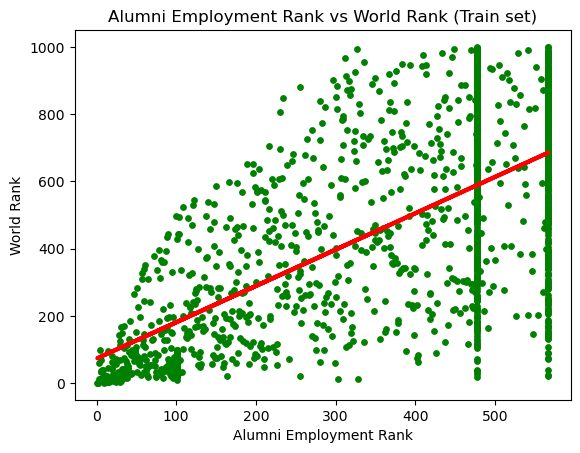

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Alumni Employment Rank vs World Rank (Train set)')
plot_test.xlabel('Alumni Employment Rank')
plot_test.ylabel('World Rank')
plot_test.show()

## 5. Discussion

The regression analysis results suggest a positive association between the alumni employment rank and the world rank of universities. Specifically, the slope coefficient of 1.0800366 indicates that, on average, for every one-unit increase in the alumni employment rank, the world rank of universities tends to increase by approximately 1.08 units. Furthermore, the R2 score of roughly 0.44 to 0.47 indicates that around 44% to 47% of the variability in the world rank of universities can be explained by the alumni employment rank.

Therefore, based on these results, the model is not overfitting the training data, as the model performs slightly better on the test than the training set. However, the difference in the R2 score between the test and training groups is slight, indicating that the model's performance is consistent on both datasets.

Possible data bias can significantly impact the results of the regression analysis and the conclusions that can be drawn from them. For example, suppose the dataset used to perform the regression analysis is biased towards certain types of universities, such as those located in specific regions or those specializing in certain fields. In that case, the results may differ from the broader university population. In such cases, the analysis results may not be generalizable to other populations, and any conclusions drawn from the analysis may be limited in their applicability.
Additionally, bias in the data could lead to accurate or complete information about the alumni employment rank or the world rank of universities. For example, if the data collection methods are inconsistent across all universities, or if some universities choose not to report their alumni employment rank, this could create bias in the dataset and impact the accuracy of the results.